In [333]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Example dataset

In [334]:
lon_range = [-80,20]
lat_range = [20,80]

In [335]:
df = pd.read_csv("example_ensemble.csv", parse_dates=["time"])

In [336]:
starts = (
    df.sort_values("time")
      .groupby("traj_id", as_index=False)
      .first()
)

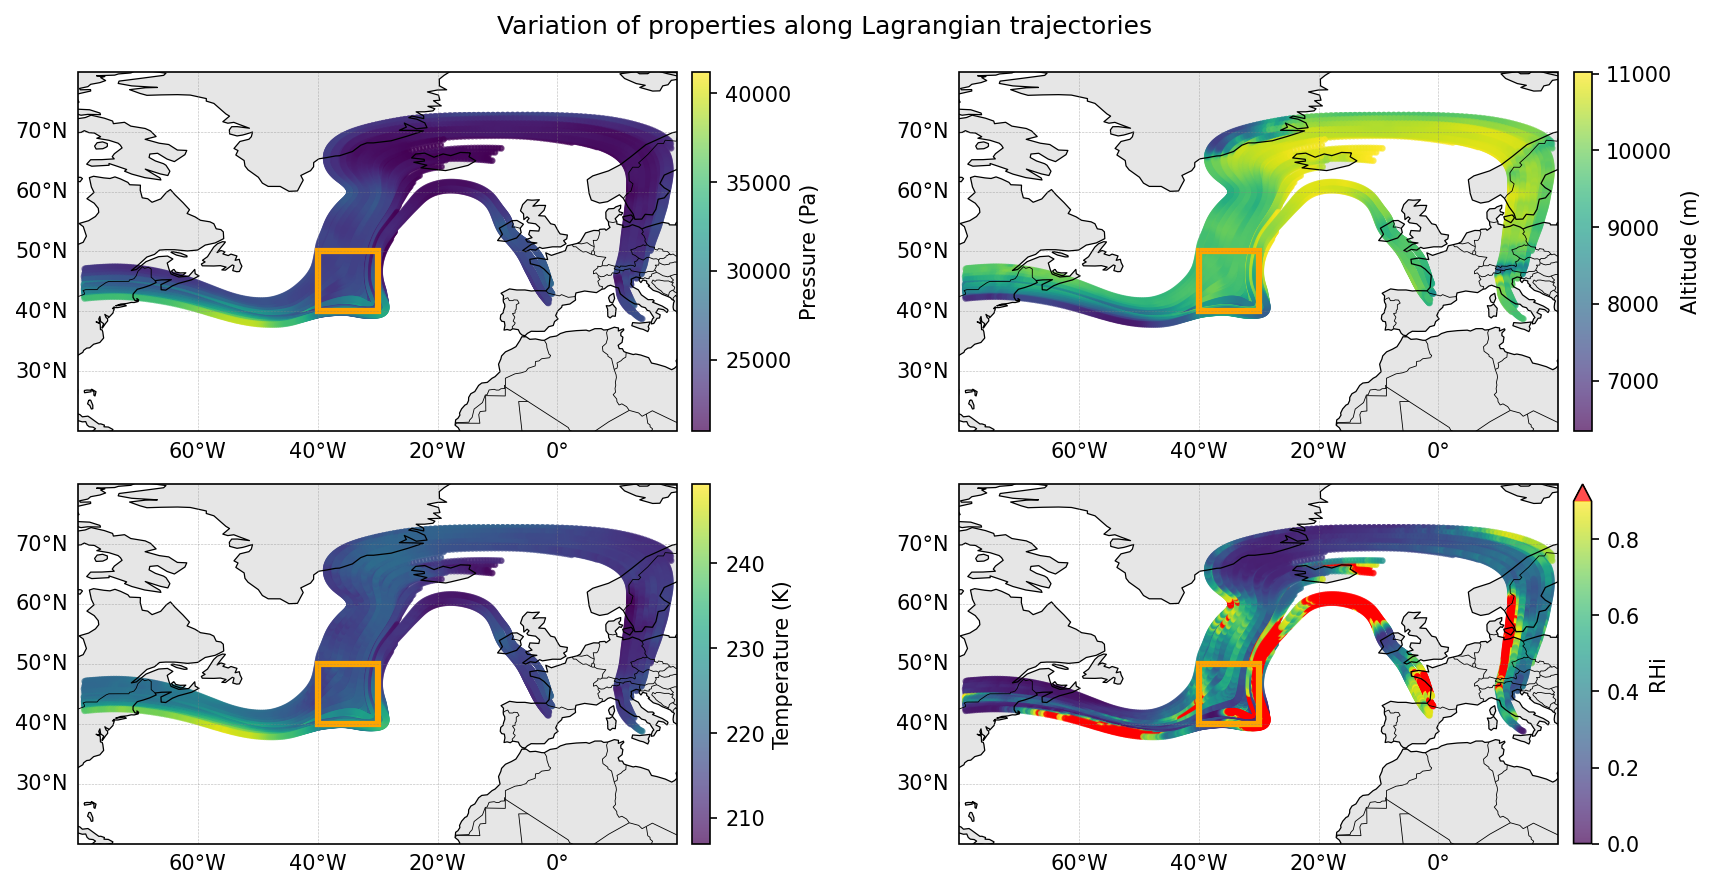

In [337]:
fig, axes = plt.subplots(2, 2, figsize=(12,6),
                         subplot_kw={"projection": ccrs.PlateCarree()},
                         dpi=150)

fig.suptitle("Variation of properties along Lagrangian trajectories")

ax = axes[0,0]
sc = ax.scatter(df["lon"], df["lat"], c=df["p"], cmap="viridis",
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Pressure (Pa)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[0,1]
sc = ax.scatter(df["lon"], df["lat"], c=df["z"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Altitude (m)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[1,0]
sc = ax.scatter(df["lon"], df["lat"], c=df["t"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree())

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Temperature (K)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())

ax = axes[1,1]

cmap = plt.get_cmap("viridis").copy()
cmap.set_over("red")
norm = colors.Normalize(vmin=0, vmax=0.9)

sc = ax.scatter(df["lon"], df["lat"], c=df["rhi"],
                s=5, alpha=0.7, transform=ccrs.PlateCarree(),
                cmap=cmap, norm=norm)


cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285, extend="max")
cbar.set_label("RHi")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())


rect = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')
rect1 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')
rect2 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')

rect3 = patches.Rectangle((-40,40),10,10,linewidth=3,edgecolor='orange',facecolor='none')


axes[0,0].add_patch(rect)
axes[0,1].add_patch(rect1)
axes[1,0].add_patch(rect2)
axes[1,1].add_patch(rect3)

plt.tight_layout()
plt.show()

In [338]:
index = 12

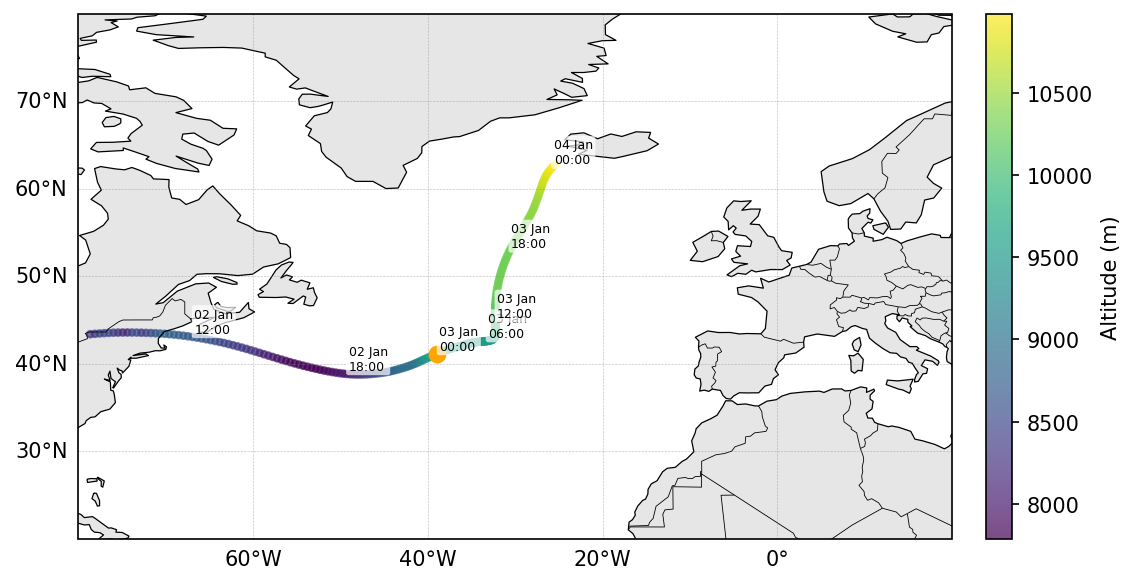

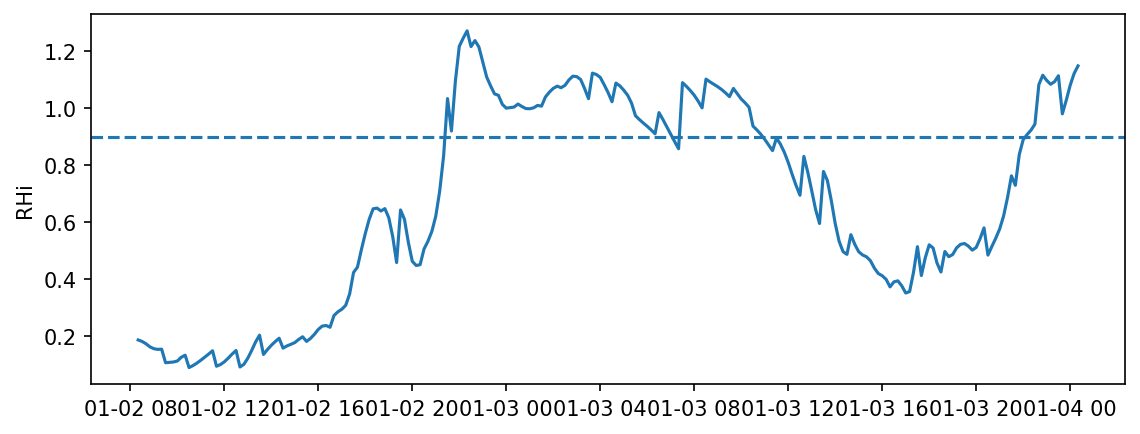

In [339]:
temp = df.loc[df['traj_id'].isin([index])]
rhis = temp.rhi
alts = temp.z
times = temp.time

fig, ax = plt.subplots(figsize=(12,4),
                         subplot_kw={"projection": ccrs.PlateCarree()},
                         dpi=150)

sc = ax.scatter(temp["lon"], temp["lat"], c=temp["z"], cmap="viridis",
                s=10, alpha=0.7, transform=ccrs.PlateCarree())
ax.scatter(starts["start_lon"][index-1], starts["start_lat"][index-1], marker="o", c="orange",
           s=50, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=4)

cbar = plt.colorbar(sc, ax=ax, pad=0.02, fraction=0.0285)
cbar.set_label("Altitude (m)")

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())


three_hourly = temp[
    (temp["time"].dt.minute == 0) &
    (temp["time"].dt.hour % 6 == 0)
]

# Offset (degrees)
dx = 0.2
dy = 0.15

for _, row in three_hourly.iterrows():
    ax.text(
        row["lon"] + dx,
        row["lat"] + dy,
        row["time"].strftime("%d %b\n%H:%M"),
        fontsize=6,
        ha="left",
        va="bottom",
        zorder=4,
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.7,
            boxstyle="round,pad=0.2"
        )
    )

fig.tight_layout()
plt.show()


fig, ax = plt.subplots(1,1 ,figsize=(7.7,3),dpi=150)

ax.plot(times, rhis)
ax.set_ylabel("RHi")
ax.axhline(0.9, linestyle='--')

step = 100

fig.tight_layout()
plt.show()



# Working (one trajectory)

In [340]:
def signed_ascent_48h(traj: pd.DataFrame, meta: pd.DataFrame):
    """
    Negative => ascent, Positive => descent.
    """

    rhi_start = meta["rhi_start_time"].iloc[0]
    if pd.isna(rhi_start):
        ref_time = pd.to_datetime(meta["start_time"].iloc[0])
    else:
        ref_time = pd.to_datetime(rhi_start)

    window = traj[traj["time"] < ref_time].sort_values("time")

    if len(window) < 2:
        return np.nan

    t0 = ref_time - pd.Timedelta(hours=48)
    if window["time"].iloc[0] < t0:
        window = window[window["time"] >= t0]

    imax = window["p"].idxmax()
    imin = window["p"].idxmin()

    p_max, t_max = window.loc[imax, ["p", "time"]]
    p_min, t_min = window.loc[imin, ["p", "time"]]

    return (p_min - p_max) if (t_max < t_min) else (p_max - p_min)

def relative_hours(times, t0):
    return (times - t0) / np.timedelta64(1, "h")


In [341]:
df = pd.read_csv("ensemble.csv", parse_dates=["time"])
df_meta = pd.read_csv("ensemble_metadata.csv")
df_events = pd.read_csv("all_events.csv", parse_dates=["start_time", "end_time"])

df["time"] = pd.to_datetime(df["time"])
#df_meta["rhi_start_time"] = pd.to_datetime(df_meta["rhi_start_time"])

In [342]:
starts = (
    df.sort_values("time")
      .groupby("traj_id", as_index=False)
      .first()
)

In [343]:
list_of_traj = [g for _, g in df.groupby("traj_id")]

In [344]:
index = 6

In [345]:
traj = list_of_traj[index-1]
meta = df_meta[df_meta["id"]==index]
#start_time = meta["rhi_start_time"]

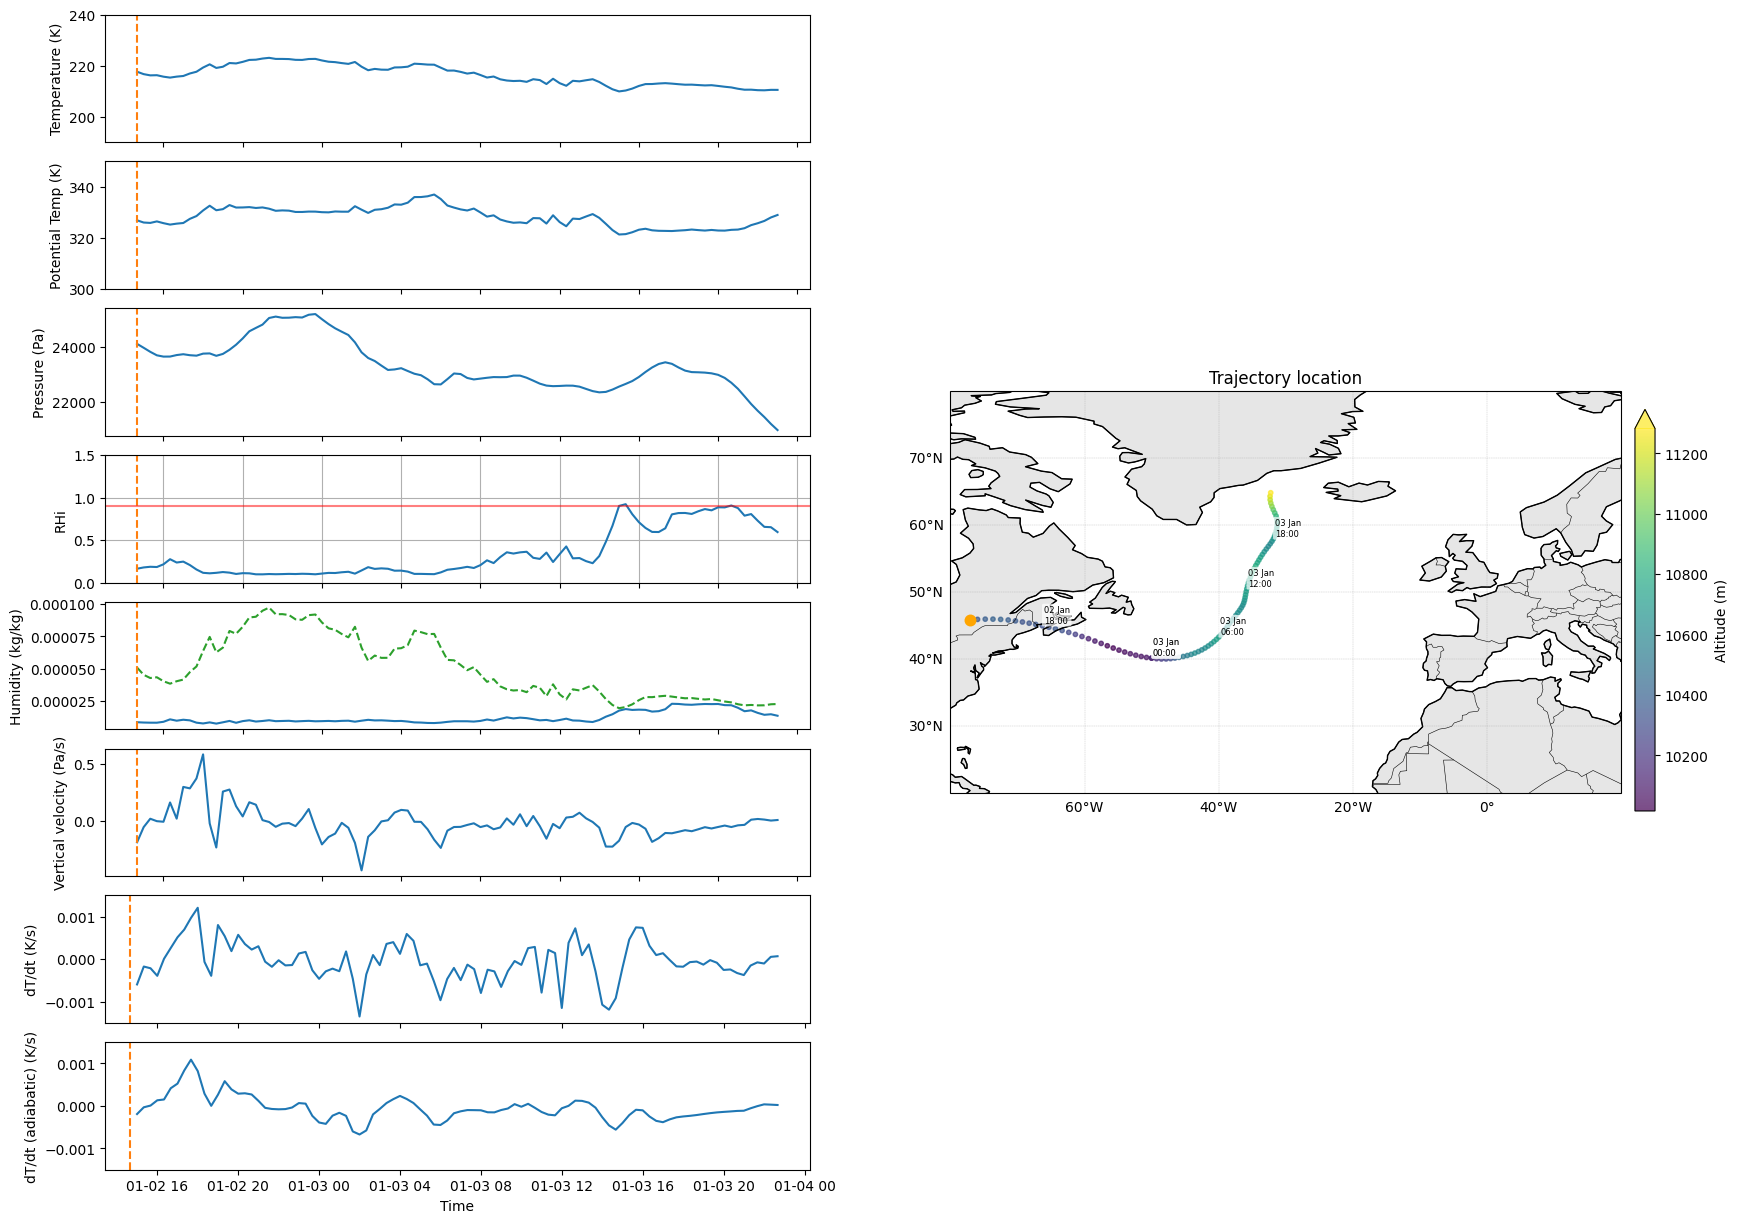

In [346]:
fig = plt.figure(figsize=(20, 15), dpi=100)

gs = GridSpec(
    nrows=8,
    ncols=2,
    width_ratios=[2, 2],
    hspace=0.15,
    wspace=0.2
)

ax = []
for i in range(8):
    ax.append(fig.add_subplot(gs[i, 0]))


ax[0].plot(traj["time"], traj["t"])
ax[0].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[0].set_ylabel("Temperature (K)")
ax[0].xaxis.set_ticklabels([])
ax[0].set_ylim(190,240)


ax[1].plot(traj["time"], traj["potential_t"])
ax[1].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[1].set_ylabel("Potential Temp (K)")
ax[1].xaxis.set_ticklabels([])
ax[1].set_ylim(300,350)


ax[2].plot(traj["time"], traj["p"])
ax[2].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[2].set_ylabel("Pressure (Pa)")
ax[2].xaxis.set_ticklabels([])

ax[3].grid()
ax[3].plot(traj["time"], traj["rhi"])
ax[3].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[3].axhline(0.9, linestyle='-', color='red',alpha=0.5)
ax[3].set_ylabel("RHi")
ax[3].xaxis.set_ticklabels([])
ax[3].set_ylim(0,1.5)

ax[4].plot(traj["time"], traj["q"])
ax[4].plot(traj["time"], traj["q_si"], linestyle='--', color='tab:green', label="Saturation specific humidity over ice")
ax[4].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[4].set_ylabel("Humidity (kg/kg)")
ax[4].xaxis.set_ticklabels([])

ax[5].plot(traj["time"], traj["w"])
ax[5].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[5].set_ylabel("Vertical velocity (Pa/s)")
ax[5].xaxis.set_ticklabels([])


ax[6].plot(traj["time"], traj["dTdt"])


ax[6].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[6].set_ylabel("dT/dt (K/s)")
ax[6].xaxis.set_ticklabels([])
ax[6].set_ylim(-0.0015,0.0015)


ax[7].plot(traj["time"], traj["dTdt_adiab"])
ax[7].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[7].set_ylabel("dT/dt (adiabatic) (K/s)")
ax[7].set_xlabel("Time")
ax[7].set_ylim(-0.0015,0.0015)


# ---- Right column: Cartopy map ----
ax_map = fig.add_subplot(gs[:, 1], projection=ccrs.PlateCarree())

ax_map.coastlines()
ax_map.set_title("Trajectory location")

# do plotting

sc = ax_map.scatter(traj["lon"], traj["lat"], c=traj["z"]/9.81, cmap="viridis",
                s=10, alpha=0.7, transform=ccrs.PlateCarree())
ax_map.scatter(meta["start_lon"][index-1], meta["start_lat"][index-1], marker="o", c="orange",
           s=50, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=4)

ax_map.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax_map.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax_map.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax_map.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax_map.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax_map, pad=0.02, fraction=0.0285, extend="max")
cbar.set_label("Altitude (m)")

three_hourly = traj[
    (traj["time"].dt.minute == 0) &
    (traj["time"].dt.hour % 6 == 0)
]

# Offset (degrees)
dx = 0.2
dy = 0.15

for _, row in three_hourly.iterrows():
    ax_map.text(
        row["lon"] + dx,
        row["lat"] + dy,
        row["time"].strftime("%d %b\n%H:%M"),
        fontsize=6,
        ha="left",
        va="bottom",
        transform=ccrs.PlateCarree(),
        zorder=4,
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.7,
            boxstyle="round,pad=0.2"
        )
    )

plt.show()

In [347]:
traj.keys()

Index(['traj_id', 'time', 'lon', 'lat', 'p', 'z', 'gh', 't', 'u', 'v', 'w',
       'q', 'storm_r_km', 'q_si', 'in_storm', 'potential_t', 'dTdt',
       'direction_rad', 'dqdt', 'd', 'curv', 'speed', 'storm_id', 'dTdt_adiab',
       'curv_raw', 'storm_theta_rad', 'mask100', 'mask', 'rhi', 'mask110'],
      dtype='object')

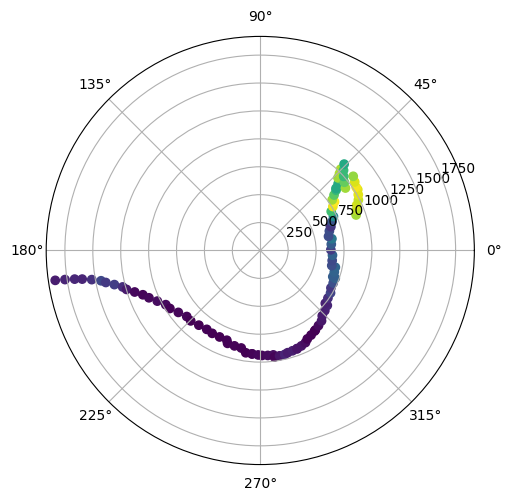

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8), subplot_kw={'projection': 'polar'},
                        layout='constrained')

ax.scatter(traj["storm_theta_rad"], traj["storm_r_km"], c=traj["rhi"])

plt.show()

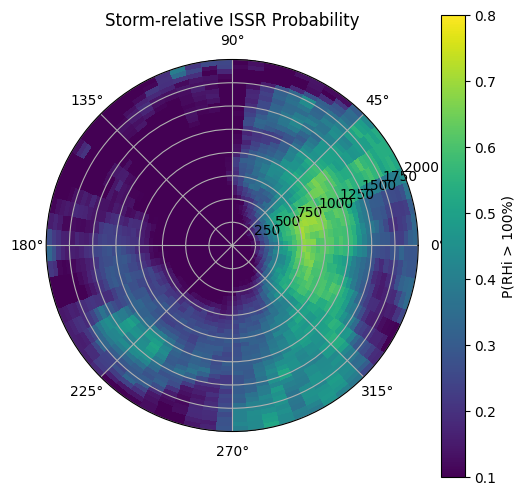

In [349]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Collect all data
# ----------------------------

all_theta = []
all_r = []
all_rhi = []

for traj in list_of_traj:

    theta = np.array(traj["storm_theta_rad"])
    r     = np.array(traj["storm_r_km"])
    rhi   = np.array(traj["rhi"])

    mask = ~np.isnan(theta) & ~np.isnan(r) & ~np.isnan(rhi)

    all_theta.append(theta[mask])
    all_r.append(r[mask])
    all_rhi.append(rhi[mask])

all_theta = np.concatenate(all_theta)
all_r     = np.concatenate(all_r)
all_rhi   = np.concatenate(all_rhi)

# ----------------------------
# 2. Define bins
# ----------------------------

r_max = 2000
n_r = 40
n_theta = 72

r_bins = np.linspace(0, r_max, n_r + 1)
theta_bins = np.linspace(-np.pi, np.pi, n_theta + 1)

# ----------------------------
# 3. Bin counts
# ----------------------------

# Total counts in each bin
H_total, _, _ = np.histogram2d(
    all_r,
    all_theta,
    bins=[r_bins, theta_bins]
)

# ISSR counts (RHi > 100)
issr_mask = all_rhi > 0.9

H_issr, _, _ = np.histogram2d(
    all_r[issr_mask],
    all_theta[issr_mask],
    bins=[r_bins, theta_bins]
)

# ----------------------------
# 4. Probability
# ----------------------------

with np.errstate(invalid='ignore', divide='ignore'):
    issr_prob = H_issr / H_total

# Mask bins with very few samples
min_count = 10
issr_prob[H_total < min_count] = np.nan

# ----------------------------
# 5. Plot
# ----------------------------

Theta, R = np.meshgrid(theta_bins, r_bins)

fig, ax = plt.subplots(
    figsize=(6,6),
    subplot_kw={'projection': 'polar'}
)

pc = ax.pcolormesh(
    Theta,
    R,
    issr_prob,
    cmap="viridis",
    shading="auto",
    vmin=0.1,
    vmax=0.8
)


ax.set_ylim(0, r_max)

plt.colorbar(pc, ax=ax, label="P(RHi > 100%)")

plt.title("Storm-relative ISSR Probability")
plt.show()


# Working (developing statistics, single trajectory)

In [350]:
def first_true_from(mask, start_idx=0):
    
    for i in range(start_idx, start_idx+len(mask)-1):
        if mask[i]:
            return i
    return None

def moisture_openness(df, q_col="q"):
    q0 = df[q_col].iloc[0]
    dq = df[q_col].iloc[-1] - q0
    return dq / q0 if q0 != 0 else np.nan

def delta_T(df, T_col="t"):
    return df[T_col].iloc[-1] - df[T_col].iloc[0]

def delta_T_adiabatic(df, dTdt_col="dTdt_adiab", time_col="time"):
    dt = df[time_col].diff().dt.total_seconds().mean()
    return (df[dTdt_col] * dt).sum()

def delta_theta(df, theta_col="potential_t"):
    return df[theta_col].iloc[-1] - df[theta_col].iloc[0]

def saturation_control(df, q_col="q", qsi_col="q_si"):
    dq = df[q_col].iloc[-1] - df[q_col].iloc[0]
    dqsi = df[qsi_col].iloc[-1] - df[qsi_col].iloc[0]
    denom = abs(dq) + abs(dqsi)
    return abs(dq) / denom if denom > 0 else np.nan

def integrated_ascent(df, w_col="w", dt_hours=1/3):
    dt_seconds = dt_hours * 3600.0
    w_pos = df[w_col].clip(lower=0)
    return (w_pos * dt_seconds).sum()


def detect_issrs(rhi, threshold=0.9, n_persist=4):
    issrs = []
    i = 0
    n = len(rhi)

    while i < n - n_persist:
        # ---- detect entry ----
        if (rhi[i] >= threshold):
            start = i

            # ---- find exit ----
            j = i + n_persist
            while j < n - n_persist:
                if np.all(rhi[j:j+n_persist] < threshold):
                    end = j
                    break
                j += 1
            else:
                end = n  # runs to end of trajectory

            issrs.append((start, end))
            i = end  # jump past this ISSR
        else:
            i += 1

    return issrs


In [351]:
index = 4

In [352]:
traj    = list_of_traj[index-1]
meta    = df_meta[df_meta["id"]==index]
events  = df_events[df_events["traj_id"]==index]

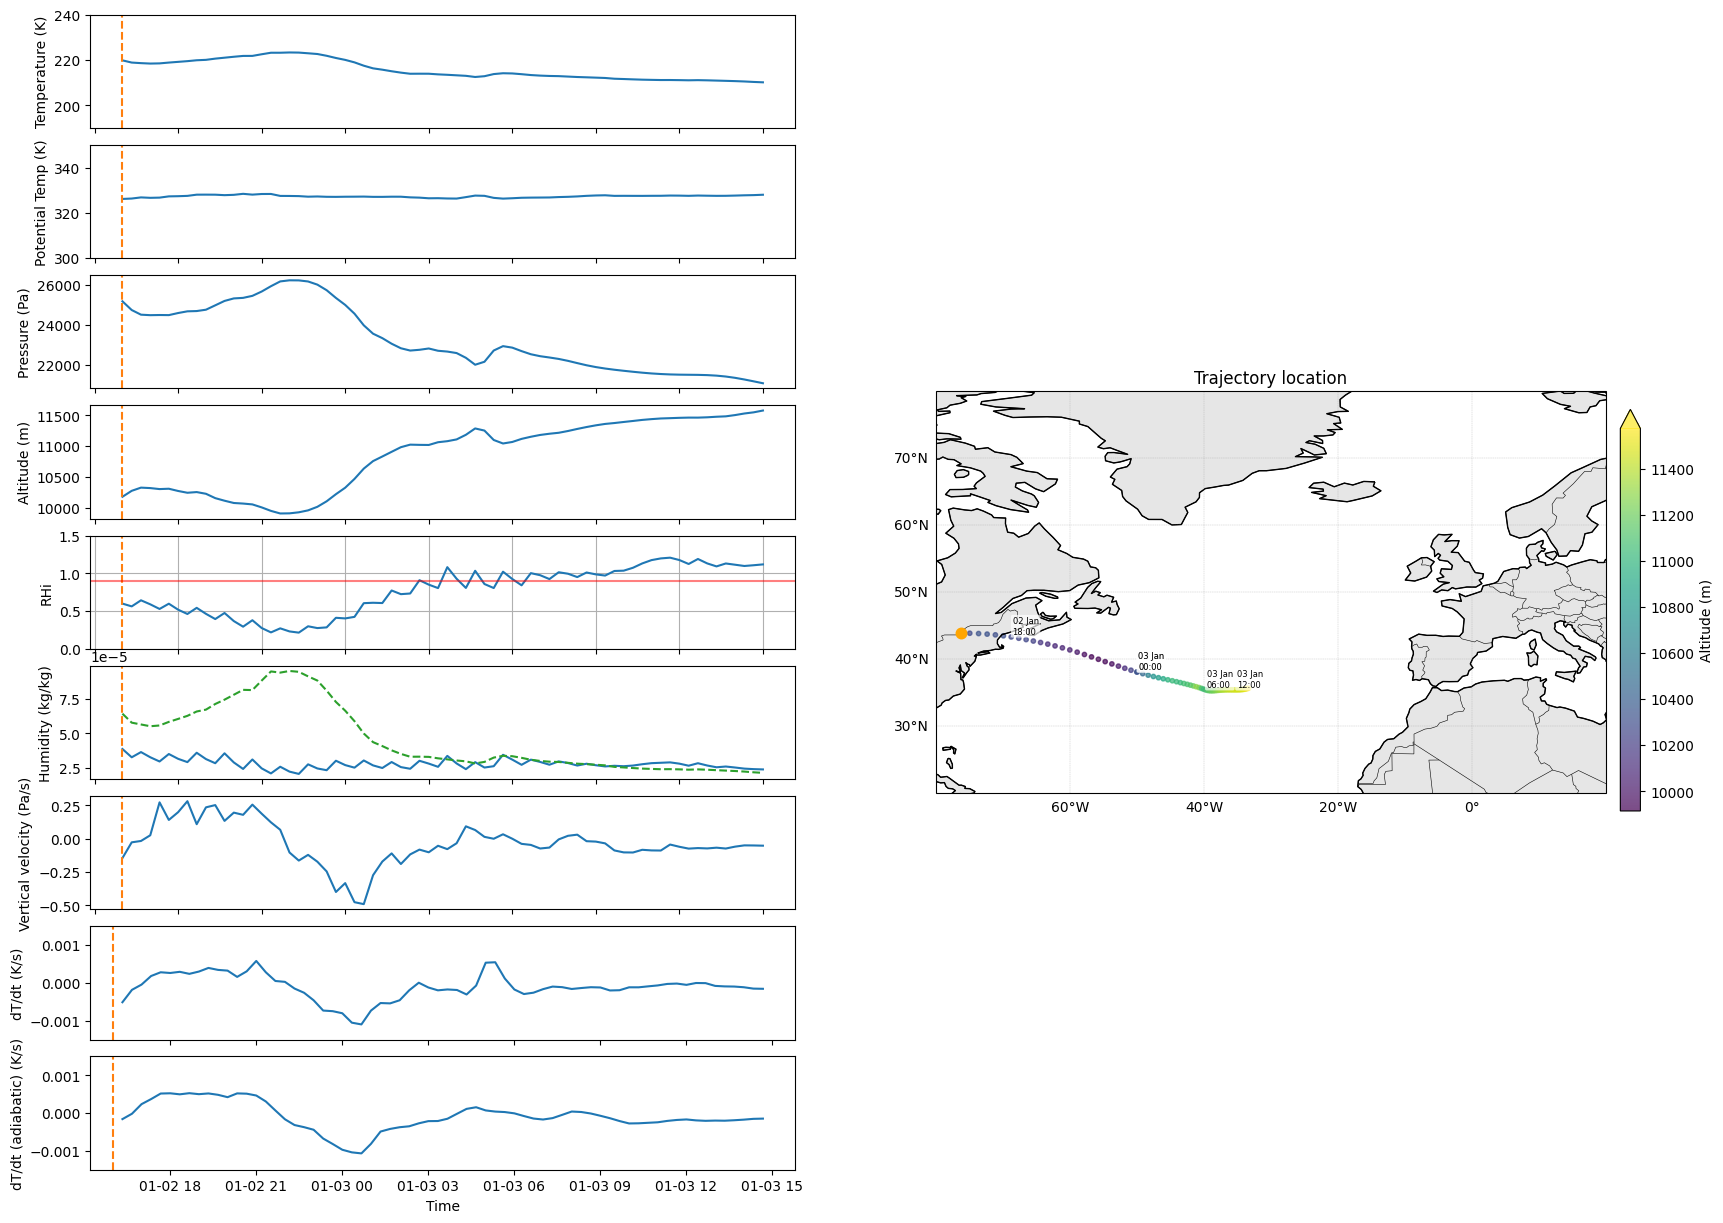

In [353]:
fig = plt.figure(figsize=(20, 15), dpi=100)

gs = GridSpec(
    nrows=9,
    ncols=2,
    width_ratios=[2, 2],
    hspace=0.15,
    wspace=0.2
)

ax = []
for i in range(9):
    ax.append(fig.add_subplot(gs[i, 0]))


ax[0].plot(traj["time"], traj["t"])
ax[0].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[0].set_ylabel("Temperature (K)")
ax[0].xaxis.set_ticklabels([])
ax[0].set_ylim(190,240)


ax[1].plot(traj["time"], traj["potential_t"])
ax[1].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[1].set_ylabel("Potential Temp (K)")
ax[1].xaxis.set_ticklabels([])
ax[1].set_ylim(300,350)


ax[2].plot(traj["time"], traj["p"])
ax[2].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[2].set_ylabel("Pressure (Pa)")
ax[2].xaxis.set_ticklabels([])

ax[3].plot(traj["time"], traj["gh"])
ax[3].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[3].set_ylabel("Altitude (m)")
ax[3].xaxis.set_ticklabels([])

ax[4].grid()
ax[4].plot(traj["time"], traj["rhi"])
ax[4].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[4].axhline(0.9, linestyle='-', color='red',alpha=0.5)
ax[4].set_ylabel("RHi")
ax[4].xaxis.set_ticklabels([])
ax[4].set_ylim(0,1.5)

ax[5].plot(traj["time"], traj["q"])
ax[5].plot(traj["time"], traj["q_si"], linestyle='--', color='tab:green', label="Saturation specific humidity over ice")
ax[5].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[5].set_ylabel("Humidity (kg/kg)")
ax[5].xaxis.set_ticklabels([])

ax[6].plot(traj["time"], traj["w"])
ax[6].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[6].set_ylabel("Vertical velocity (Pa/s)")
ax[6].xaxis.set_ticklabels([])


ax[7].plot(traj["time"], traj["dTdt"])


ax[7].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[7].set_ylabel("dT/dt (K/s)")
ax[7].xaxis.set_ticklabels([])
ax[7].set_ylim(-0.0015,0.0015)


ax[8].plot(traj["time"], traj["dTdt_adiab"])
ax[8].axvline(meta["start_time"], linestyle='--', color='tab:orange')
ax[8].set_ylabel("dT/dt (adiabatic) (K/s)")
ax[8].set_xlabel("Time")
ax[8].set_ylim(-0.0015,0.0015)


# ---- Right column: Cartopy map ----
ax_map = fig.add_subplot(gs[:, 1], projection=ccrs.PlateCarree())

ax_map.coastlines()
ax_map.set_title("Trajectory location")

# do plotting

sc = ax_map.scatter(traj["lon"], traj["lat"], c=traj["gh"], cmap="viridis",
                s=10, alpha=0.7, transform=ccrs.PlateCarree())
ax_map.scatter(meta["start_lon"][index-1], meta["start_lat"][index-1], marker="o", c="orange",
           s=50, linewidths=1.5, transform=ccrs.PlateCarree(), zorder=4)

ax_map.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax_map.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax_map.add_feature(cfeature.BORDERS, linewidth=0.4)
gl = ax_map.gridlines(draw_labels=True, linewidth=0.3, color="gray",
                  alpha=0.5, linestyle="--")
gl.top_labels = False
gl.right_labels = False
ax_map.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], ccrs.PlateCarree())
cbar = plt.colorbar(sc, ax=ax_map, pad=0.02, fraction=0.0285, extend="max")
cbar.set_label("Altitude (m)")

three_hourly = traj[
    (traj["time"].dt.minute == 0) &
    (traj["time"].dt.hour % 6 == 0)
]

# Offset (degrees)
dx = 0.2
dy = 0.15

for _, row in three_hourly.iterrows():
    ax_map.text(
        row["lon"] + dx,
        row["lat"] + dy,
        row["time"].strftime("%d %b\n%H:%M"),
        fontsize=6,
        ha="left",
        va="bottom",
        transform=ccrs.PlateCarree(),
        zorder=4,
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.7,
            boxstyle="round,pad=0.2"
        )
    )

plt.show()

In [354]:
detect_issrs(np.array(traj["rhi"]))

[(33, 71)]

In [355]:
M = events["M"][events["issr_id"]==1].values[0]
T = events["T"][events["issr_id"]==1].values[0]

M_plus = max(0,M)
T_plus = max(0,T)

C = T_plus / (T_plus + M_plus)

In [356]:
display(events)

print("C = ",C)

,traj_id,issr_id,start_idx,end_idx,start_time,end_time,mean_rhi,max_rhi,has_window,recent_event,M,T,T_avg,dT,dT_adiab,dtheta,saturation_control,integrated_ascent
8,4,1,34,71,2019-01-03 02:40:00,2019-01-03 15:00:00,1.021988,1.207625,True,False,-0.011826,0.965136,219.777457,-8.605708,-9.52804,-1.477294,0.005168,424.409712


C =  1.0


# Synoptic


In [357]:
met = xr.open_dataset('lagrangian/data/20190102_surf.nc')

df = pd.read_csv("storm_tracks.csv", parse_dates=["time"])
df2 = pd.read_csv("pressure_lows.csv", parse_dates=["time"])
df = df.sort_values(["storm_id"])

In [358]:
msl = met.isel(valid_time=0)["msl"]/100

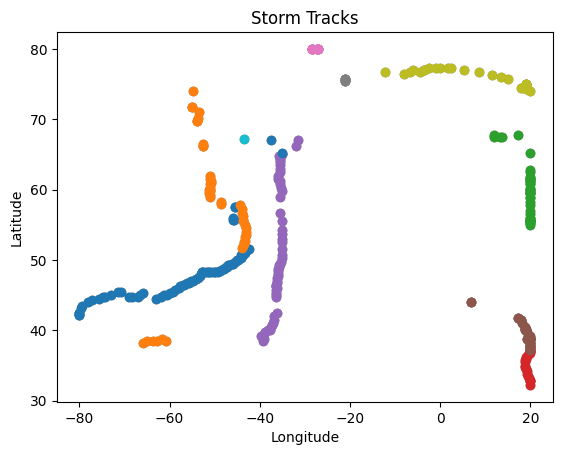

In [359]:

plt.scatter(df2["lon"], df2["lat"], color="grey")


for sid, group in df.groupby("storm_id"):

    plt.scatter(group["lon"], group["lat"])



plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Storm Tracks")
plt.show()


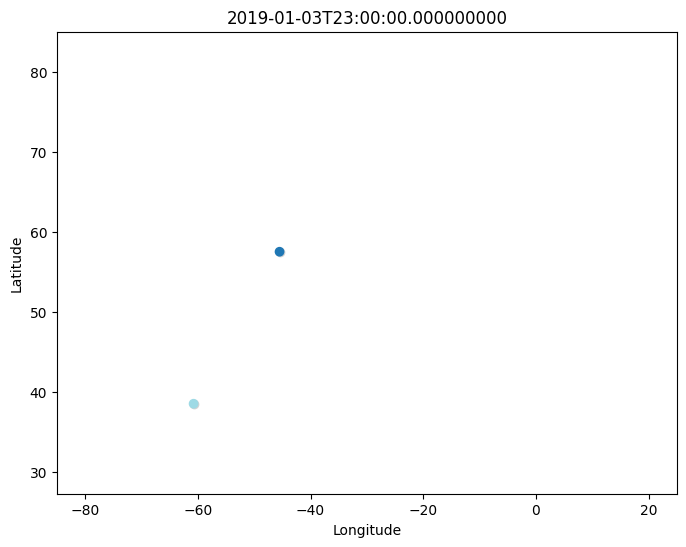

In [360]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import numpy as np

df2["time"] = pd.to_datetime(df2["time"])
df["time"] = pd.to_datetime(df["time"])

times = np.sort(df2["time"].unique())
all_ids = np.sort(df["storm_id"].unique())

base_cmap = matplotlib.colormaps.get_cmap("tab20")
cmap = base_cmap.resampled(len(all_ids))
color_dict = {sid: cmap(i) for i, sid in enumerate(all_ids)}

fig, ax = plt.subplots(figsize=(8,6))

sc_lows = ax.scatter([], [], color="lightgrey")
sc_tracks = ax.scatter([], [])

ax.set_xlim(df2["lon"].min()-5, df2["lon"].max()+5)
ax.set_ylim(df2["lat"].min()-5, df2["lat"].max()+5)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

def init():
    sc_lows.set_offsets(np.empty((0,2)))
    sc_tracks.set_offsets(np.empty((0,2)))
    return sc_lows, sc_tracks

def update(frame):
    t = times[frame]

    # Lows
    data = df2[df2["time"] == t]
    sc_lows.set_offsets(np.c_[data["lon"], data["lat"]])

    # Tracks
    track_data = df[df["time"] == t]
    if len(track_data) > 0:
        coords = np.c_[track_data["lon"], track_data["lat"]]
        colors = [color_dict[sid] for sid in track_data["storm_id"]]
        sc_tracks.set_offsets(coords)
        sc_tracks.set_color(colors)
    else:
        sc_tracks.set_offsets(np.empty((0,2)))

    ax.set_title(str(t))
    return sc_lows, sc_tracks

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(times),
    init_func=init,
    blit=True
)

ani.save("storm_tracking.gif", writer="pillow", fps=3)



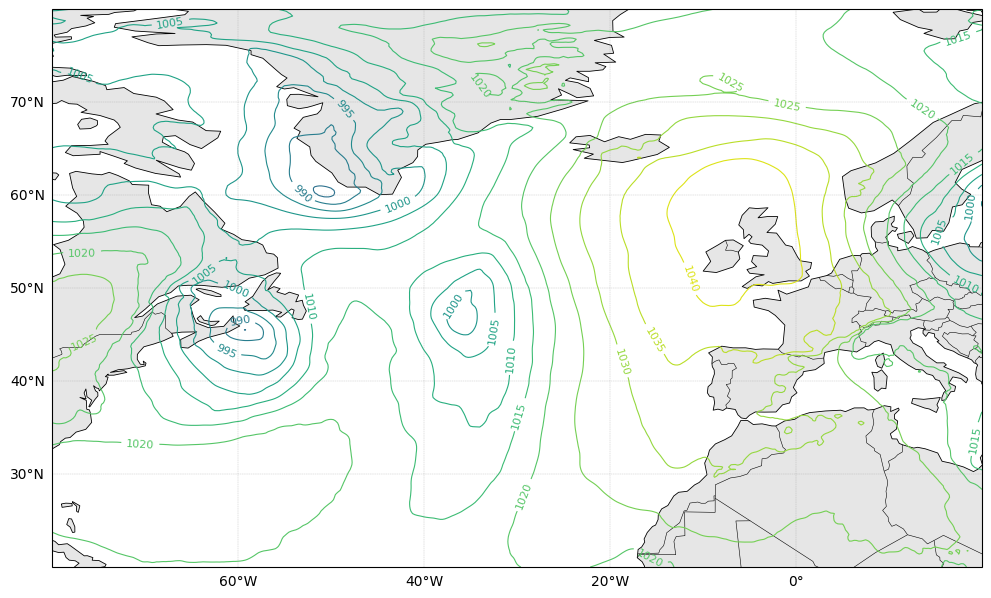

In [361]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()}, dpi=100)
ax.set_extent([-80,20,20,80], crs=ccrs.PlateCarree())

levels = np.arange(950, 1050, 5)

lon_plot = msl.longitude.values
lat_plot = msl.latitude.values
pressure = msl.values

cs = ax.contour(lon_plot, lat_plot, pressure, levels=levels, linewidths=0.8, transform=ccrs.PlateCarree())

#lows = ax.scatter(df_t["lon"], df_t["lat"], color='blue', s=10, transform=ccrs.PlateCarree(), label='Lows', zorder=10)

ax.clabel(cs, fmt="%d", fontsize=8)

ax.add_feature(cfeature.LAND, facecolor="0.9", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)

gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False   
gl.right_labels = False

plt.show()

# Working (developing statistics, ensemble)

In [362]:
df_events = pd.read_csv("all_events.csv", parse_dates=["start_time", "end_time"])

In [363]:
df = df_events[(df_events["has_window"]) & (~df_events["recent_event"])].copy()

In [364]:
df["T_pos"] = df["T"].clip(lower=0)
df["M_pos"] = df["M"].clip(lower=0)


In [365]:
df["C"] = df["T_pos"] / (df["T_pos"] + df["M_pos"])

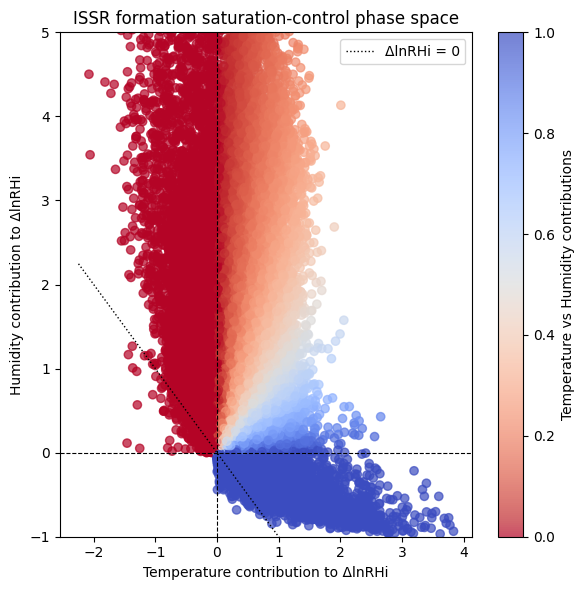

In [366]:
plt.figure(figsize=(6, 6))

sc = plt.scatter(
    df["T"],
    df["M"],
    c=df["C"],
    cmap="coolwarm_r",
    alpha=0.7
)

plt.axhline(0, lw=0.8, ls="--", c="k")
plt.axvline(0, lw=0.8, ls="--", c="k")

# Saturation threshold line
x = np.linspace(df["T"].min(), df["T"].max(), 100)
plt.plot(x, -x, "k:", lw=1, label="ΔlnRHi = 0")
plt.ylim(-1,5)

plt.xlabel("Temperature contribution to ΔlnRHi")
plt.ylabel("Humidity contribution to ΔlnRHi")
plt.title("ISSR formation saturation-control phase space")
plt.legend()
plt.colorbar(sc, label="Temperature vs Humidity contributions")
plt.tight_layout()
plt.show()


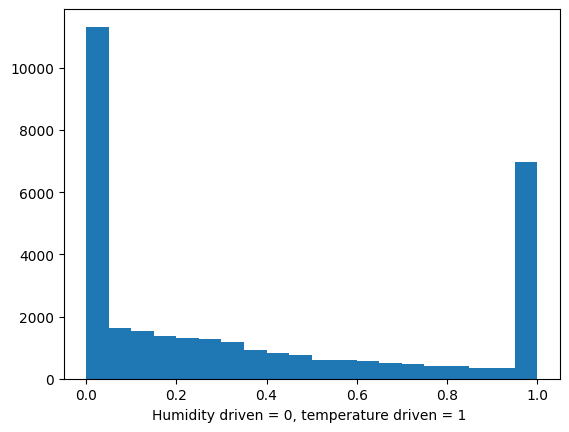

In [367]:
plt.hist(df["C"], bins=20, density=False)
plt.xlabel("Humidity driven = 0, temperature driven = 1 ")
plt.show()

# Working (metadata)

In [368]:
df_meta["dp48"] = df_meta["id"].apply(
    lambda i: signed_ascent_48h(
        list_of_traj[i - 1],
        df_meta[df_meta["id"] == i]
    )
)

KeyError: 'rhi_start_time'

In [ ]:
non_issrs    = df_meta.loc[~df_meta["start_rhi"]]
issrs        = df_meta.loc[df_meta["start_rhi"]]
issrs_subset = issrs.loc[issrs["rhi_duration_hours"] > 1]

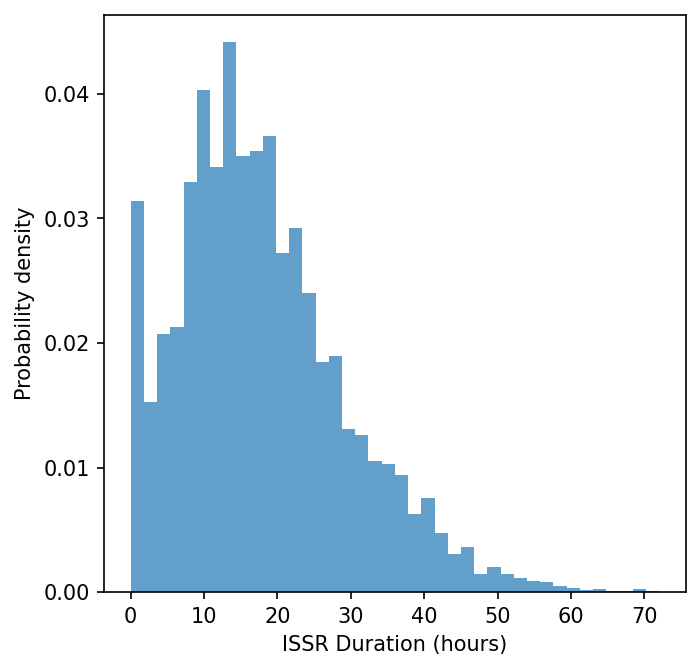

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5), dpi=150)
axs.hist(issrs["rhi_duration_hours"],  bins=40, alpha=0.7, density=True)
axs.set_xlabel("ISSR Duration (hours)")
axs.set_ylabel("Probability density")
plt.show()

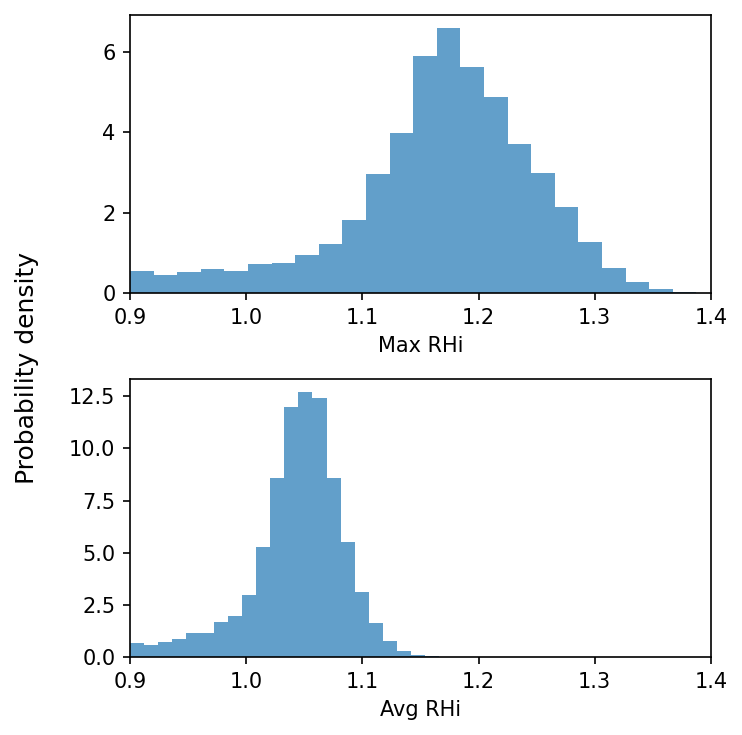

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(5,5),dpi=150)
axs[0].hist(issrs["max_rhi_issr"], bins=25, alpha=0.7, density=True)
axs[1].hist(issrs["avg_rhi_issr"], bins=25, alpha=0.7, density=True)

axs[0].set_xlabel("Max RHi")
axs[1].set_xlabel("Avg RHi")

axs[0].set_xlim([0.9,1.4])
axs[1].set_xlim([0.9,1.4])

fig.supylabel("Probability density")
fig.tight_layout()

plt.show()

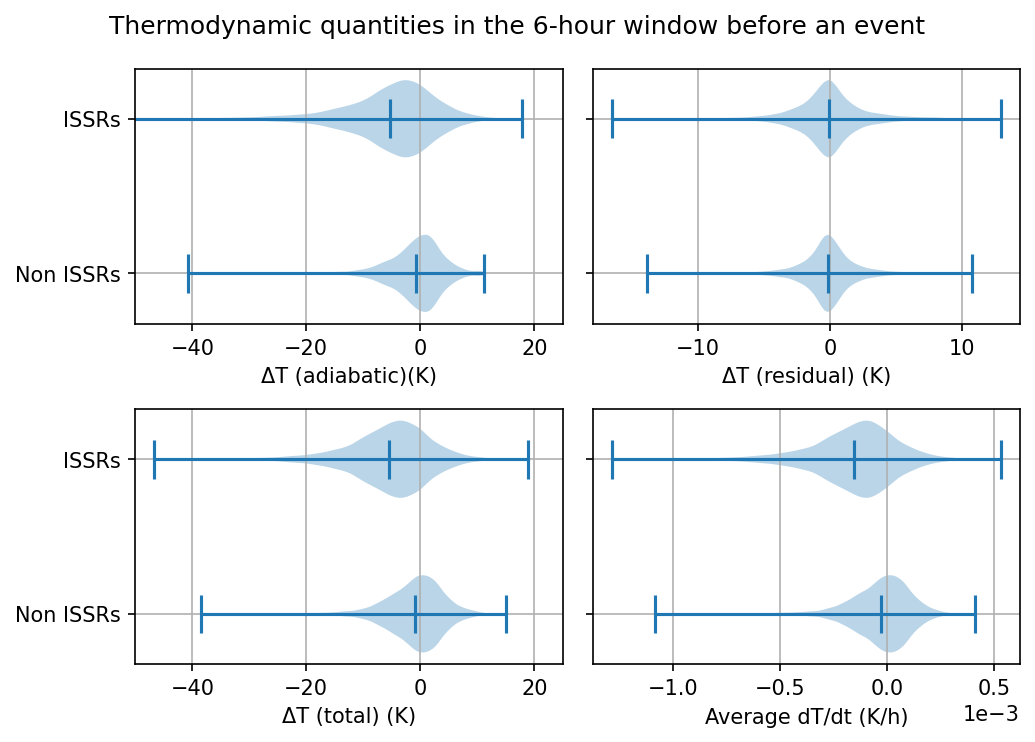

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(7,5), dpi=150)

axs[0,0].violinplot([non_issrs["delta_T_adiab_pre_event"],issrs["delta_T_adiab_pre_event"]], vert=False, showmeans=True)
axs[0,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[0,0].set_xlabel("ΔT (adiabatic)(K)")
axs[0,0].grid()
axs[0,0].set_xlim([-50,25])

axs[0,1].violinplot([non_issrs["delta_T_resid_pre_event"],issrs["delta_T_resid_pre_event"]], vert=False, showmeans=True)
axs[0,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[0,1].set_xlabel("ΔT (residual) (K)")
axs[0,1].grid()

axs[1,0].violinplot([non_issrs["delta_T_total_pre_event"],issrs["delta_T_total_pre_event"]], vert=False, showmeans=True)
axs[1,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,0].set_xlabel("ΔT (total) (K)")
axs[1,0].grid()
axs[1,0].set_xlim([-50,25])

axs[1,1].violinplot([non_issrs["avg_dTdt_pre_event"].dropna(),issrs["avg_dTdt_pre_event"].dropna()], vert=False, showmeans=True)
axs[1,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[1,1].set_xlabel("Average dT/dt (K/h)")
axs[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs[1,1].grid()

fig.suptitle("Thermodynamic quantities in the 6-hour window before an event")

plt.tight_layout()
plt.show()

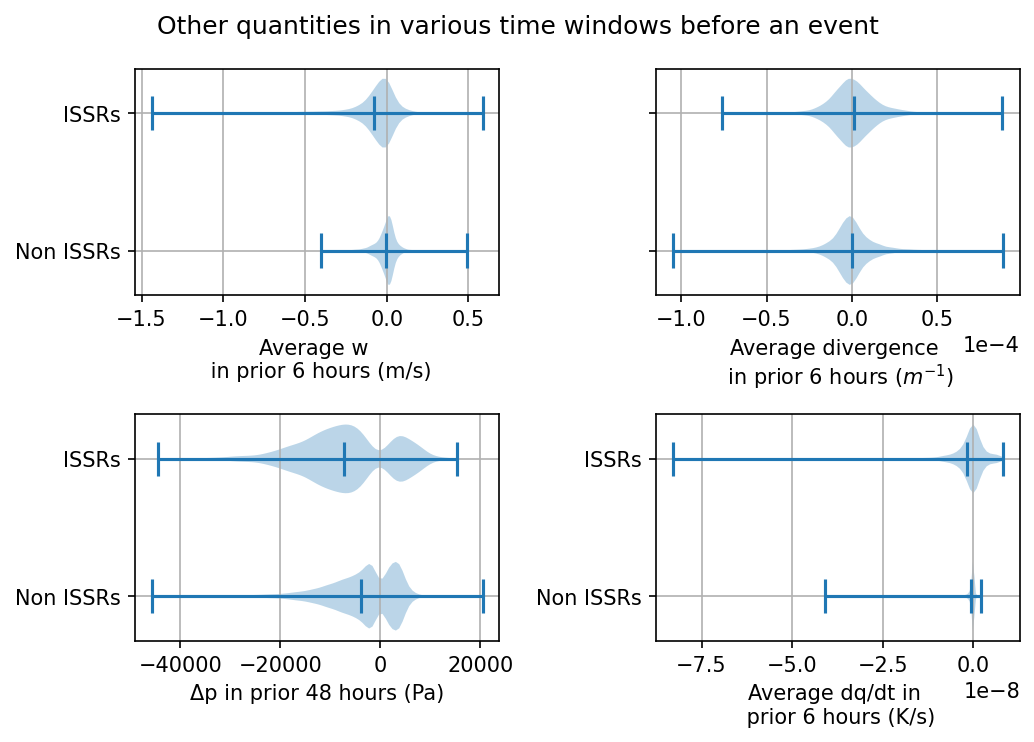

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(7,5), dpi=150)

axs[0,0].violinplot([non_issrs["avg_w_pre_event"],issrs["avg_w_pre_event"].dropna()], vert=False, showmeans=True)
axs[0,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[0,0].set_xlabel("Average w \n in prior 6 hours (m/s)")
axs[0,0].grid()

axs[0,1].violinplot([non_issrs["avg_d_pre_event"],issrs["avg_d_pre_event"].dropna()], vert=False, showmeans=True)
axs[0,1].set_yticks(np.arange(1,3), labels=["", ""])
axs[0,1].set_xlabel("Average divergence \n in prior 6 hours ($m^{-1}$)")
axs[0,1].ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs[0,1].grid()

axs[1,0].violinplot([non_issrs["dp48"].dropna(),issrs["dp48"].dropna()], vert=False, showmeans=True)
axs[1,0].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,0].set_xlabel("Δp in prior 48 hours (Pa)")
axs[1,0].grid()

axs[1,1].violinplot([non_issrs["avg_dqdt_pre_event"].dropna(),issrs["avg_dqdt_pre_event"].dropna()], vert=False, showmeans=True)
axs[1,1].set_yticks(np.arange(1,3), labels=["Non ISSRs", "ISSRs"])
axs[1,1].set_xlabel("Average dq/dt in \n prior 6 hours (K/s)")
axs[1,1].grid()

fig.suptitle("Other quantities in various time windows before an event")

plt.tight_layout()
plt.show()

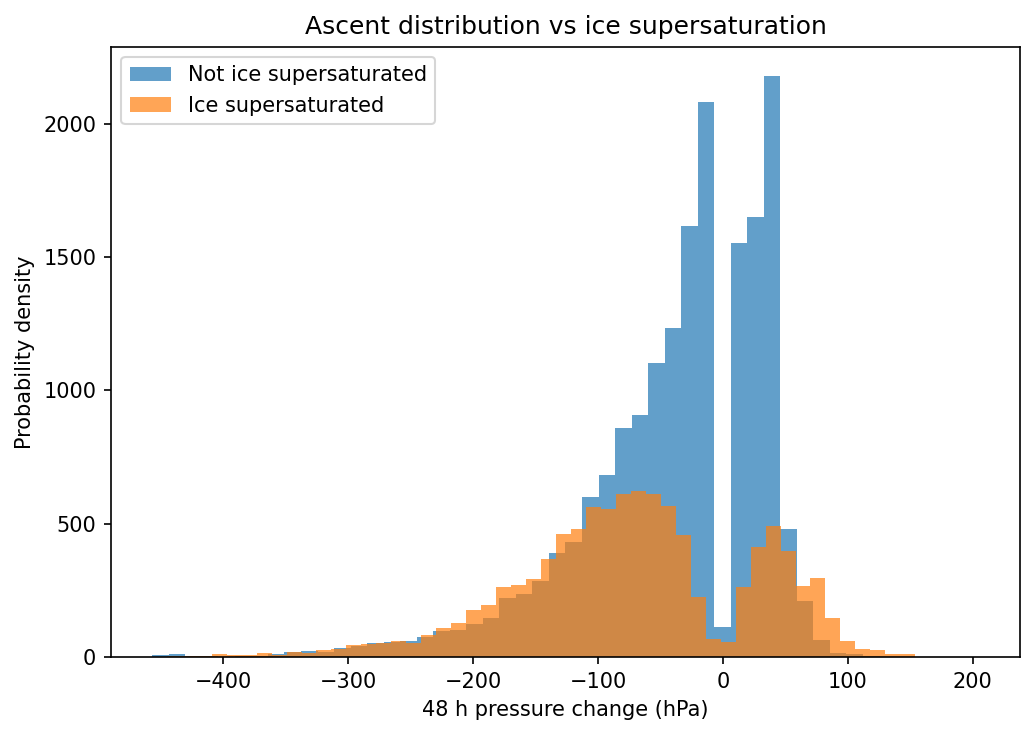

In [ ]:
df_plot = df_meta.dropna(subset=["dp48"])

dp_iss  = df_plot.loc[df_plot["start_rhi"],  "dp48"] / 100.0
dp_no   = df_plot.loc[~df_plot["start_rhi"], "dp48"] / 100.0

plt.figure(figsize=(7,5),dpi=150)
plt.hist(dp_no,  bins=50, alpha=0.7, label="Not ice supersaturated")
plt.hist(dp_iss, bins=50, alpha=0.7, label="Ice supersaturated")

plt.xlabel("48 h pressure change (hPa)")
plt.ylabel("Probability density")
plt.title("Ascent distribution vs ice supersaturation")
plt.legend()

plt.tight_layout()
plt.show()


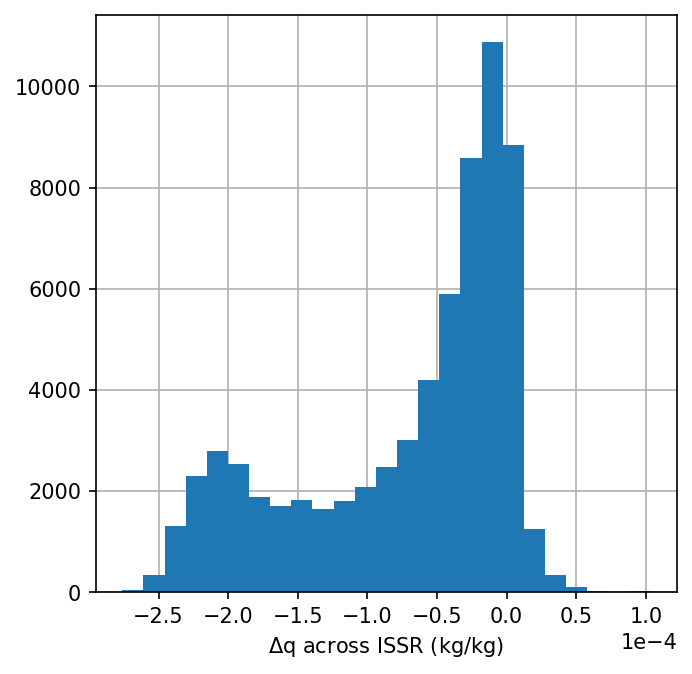

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(5,5),dpi=150)
axs.hist(issrs["delta_q_issr"], bins=25, alpha=1, density=True, zorder=2)
axs.ticklabel_format(axis='x', style='sci', scilimits=(-3,3))
axs.set_xlabel("$\Delta$q across ISSR (kg/kg)")
axs.grid()

plt.show()

# Clusterin'

In [ ]:
df = issrs.copy()

In [ ]:
mech_vars = [
    "avg_w_issr",
    "max_w_issr",
    "delta_T_adiab_pre_event",
    "dt_cold_to_event",
    
]

df_mech = df[mech_vars].dropna().copy()



In [ ]:
df_mech.describe()


,avg_w_issr,max_w_issr,delta_T_adiab_pre_event,dt_cold_to_event
count,10066.000000,10066.000000,10066.000000,10066.000000
mean,-0.074098,0.133117,-5.394259,-6.932009
std,0.079072,0.109393,8.486863,5.701730
min,-0.755911,-0.755911,-55.099637,-27.000000
25%,-0.101273,0.075645,-9.218832,-10.600000
50%,-0.056316,0.117385,-3.964339,-7.300000
75%,-0.025143,0.178916,0.000000,-3.500000
max,0.389748,1.214414,17.927947,14.300000


In [ ]:
scaler = StandardScaler()
X_mech = scaler.fit_transform(df_mech)

In [ ]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X_mech)

print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.31172758 0.27976903]


/Users/lewisclark/Documents/python_work/contrail_detection/contrail_detection_venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/lewisclark/Documents/python_work/contrail_detection/contrail_detection_venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/lewisclark/Documents/python_work/contrail_detection/contrail_detection_venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


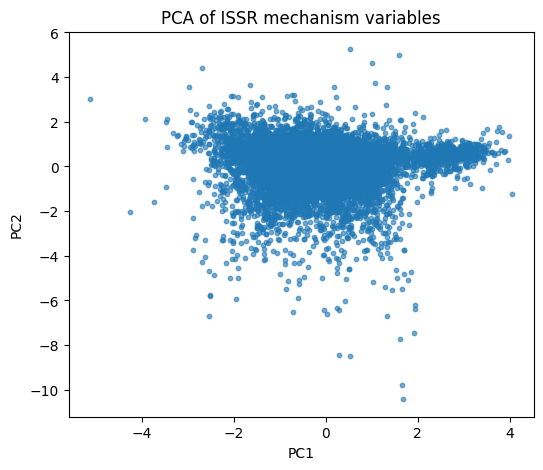

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(Xp[:,0], Xp[:,1], s=10, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of ISSR mechanism variables")
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_mech, method="ward")


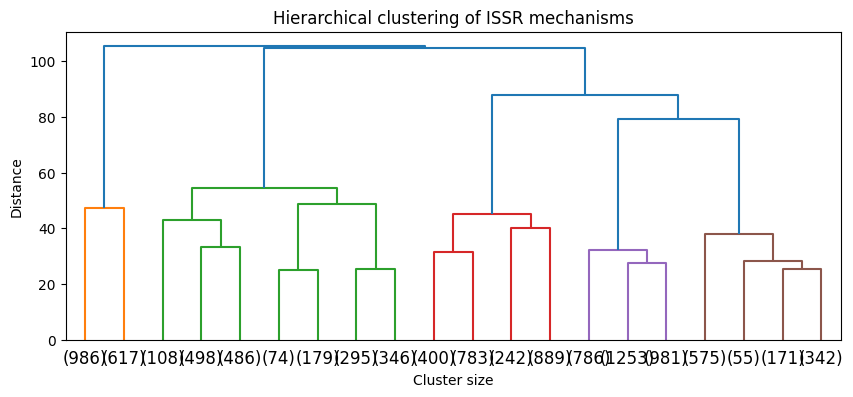

In [ ]:
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode="lastp", p=20)
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Hierarchical clustering of ISSR mechanisms")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

labels_k2 = fcluster(Z, 2, criterion="maxclust")
labels_k3 = fcluster(Z, 3, criterion="maxclust")


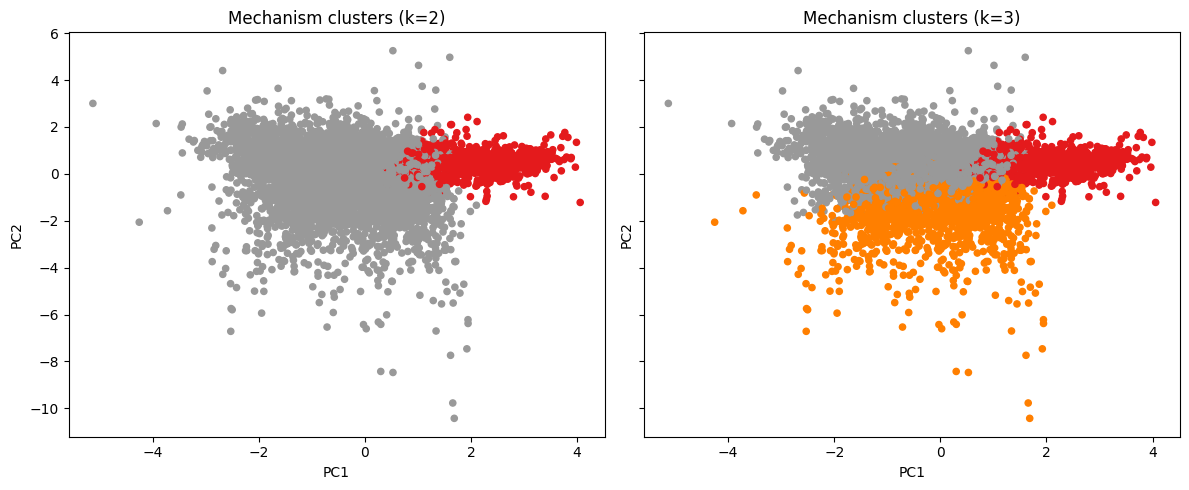

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharex=True, sharey=True)

for ax, labels, k in zip(axes, [labels_k2, labels_k3], [2, 3]):
    ax.scatter(Xp[:,0], Xp[:,1], c=labels, cmap="Set1", s=20)
    ax.set_title(f"Mechanism clusters (k={k})")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")

plt.tight_layout()
plt.show()


In [ ]:
df_mech = df_mech.copy()
df_mech["mech_cluster"] = labels_k2


In [ ]:
outcome_vars = [
    "rhi_duration_hours",
    "avg_rhi_issr",
    "max_rhi_issr",
    "t_rhi110_hours"
]

df_out = df.loc[df_mech.index, outcome_vars].copy()
df_out["mech_cluster"] = labels_k2


In [ ]:
df_out.groupby("mech_cluster").count()

,rhi_duration_hours,avg_rhi_issr,max_rhi_issr,t_rhi110_hours
mech_cluster,,,,
1,1603,1603,1603,1603
2,8463,8463,8463,8463


In [ ]:
vars_to_show = [
    # mechanism vars
    "avg_w_issr",
    "max_w_issr",
    "delta_T_adiab_pre_event",
    "delta_T_resid_pre_event",
    "dt_cold_to_event",

    # outcome vars
    "rhi_duration_hours",
    "avg_rhi_issr",
    "max_rhi_issr",
    "t_rhi110_hours",

    # extra diagnostics
    "avg_curvature_issr",
    "avg_divergence_issr"
]

In [ ]:
pd.set_option('display.max_columns', 100)
display(
    df[vars_to_show]
    .assign(mech_cluster=labels_k2)
    .groupby("mech_cluster")
    .describe(percentiles=[0.25, 0.5, 0.75])
)

avg_w_issr                                                    \
                  count      mean       std       min       25%       50%   
mech_cluster                                                                
1                1603.0 -0.025330  0.035974 -0.132016 -0.048265 -0.020887   
2                8463.0 -0.083336  0.081584 -0.755911 -0.113471 -0.064576   

                                 max_w_issr                                \
                   75%       max      count      mean       std       min   
mech_cluster                                                                
1            -0.002262  0.152424     1603.0  0.093272  0.046455 -0.113217   
2            -0.033250  0.389748     8463.0  0.140664  0.116050 -0.755911   

                                                     delta_T_adiab_pre_event  \
                   25%       50%       75%       max                   count   
mech_cluster                                                                   
1             0.064714  0.090623  0.119368  0.283205                  1603.0   
2             0.079385  0.127085  0.193021  1.214414                  8463.0   

                                                                            \
                  mean       std        min        25%       50%       75%   
mech_cluster                                                                 
1            -0.541477  4.317987 -13.400494  -3.770995 -0.439925  2.371344   
2            -6.313437  8.765577 -55.099637 -10.508415 -4.904247 -0.669729   

                        delta_T_resid_pre_event                      \
                    max                   count      mean       std   
mech_cluster                                                          
1             17.927947                  1603.0 -0.735579  1.853554   
2             17.842407                  8463.0  0.038365  2.977375   

                                                                  \
                    min       25%       50%       75%        max   
mech_cluster                                                       
1            -12.997883 -1.132111 -0.396208  0.146186   8.143056   
2            -16.506598 -1.373748 -0.028742  1.357788  12.918667   

             dt_cold_to_event                                                  \
                        count      mean       std   min   25%  50%  75%   max   
mech_cluster                                                                    
1                      1603.0  1.274236  5.180760  -7.7  -2.7 -0.5  4.8  14.3   
2                      8463.0 -8.486376  4.291098 -27.0 -11.4 -8.4 -5.2   6.6   

             rhi_duration_hours                                        \
                          count       mean        std  min        25%   
mech_cluster                                                            
1                        1603.0  16.109378  11.136941  0.0   7.666667   
2                        8463.0  18.303517  11.410940  0.0  10.000000   

                                         avg_rhi_issr                      \
                    50%        75%   max        count      mean       std   
mech_cluster                                                                
1             14.666667  22.333333  64.0       1603.0  1.027447  0.047887   
2             16.666667  24.666667  72.0       8463.0  1.047061  0.037233   

                                                               max_rhi_issr  \
                   min       25%       50%       75%       max        count   
mech_cluster                                                                  
1             0.900112  0.999634  1.033395  1.060996  1.156913       1603.0   
2             0.900189  1.030817  1.050381  1.069483  1.201979       8463.0   

                                                                          \
                  mean       std       min       25%       50%       75%   
mech_cluster                                  

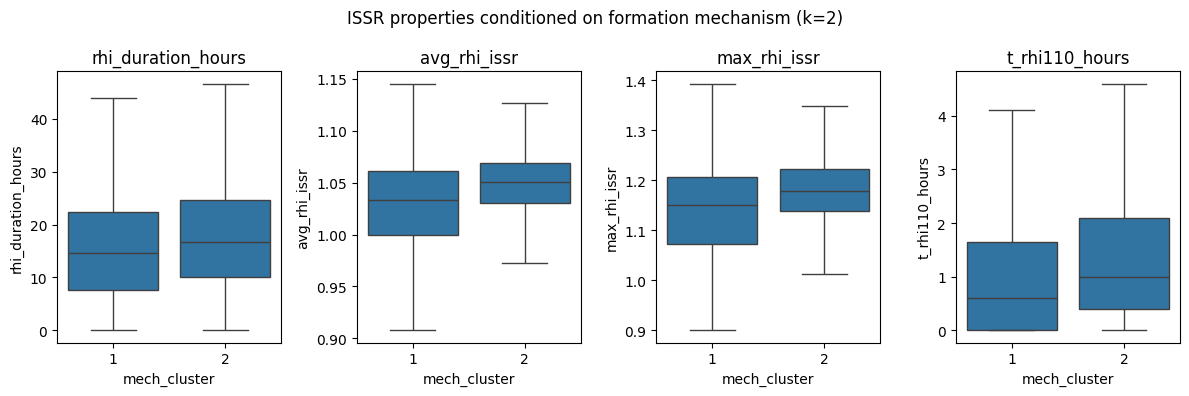

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))

for i, v in enumerate(outcome_vars, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(
        data=df_out,
        x="mech_cluster",
        y=v,
        showfliers=False
    )
    plt.title(v)

plt.suptitle("ISSR properties conditioned on formation mechanism (k=2)")
plt.tight_layout()
plt.show()


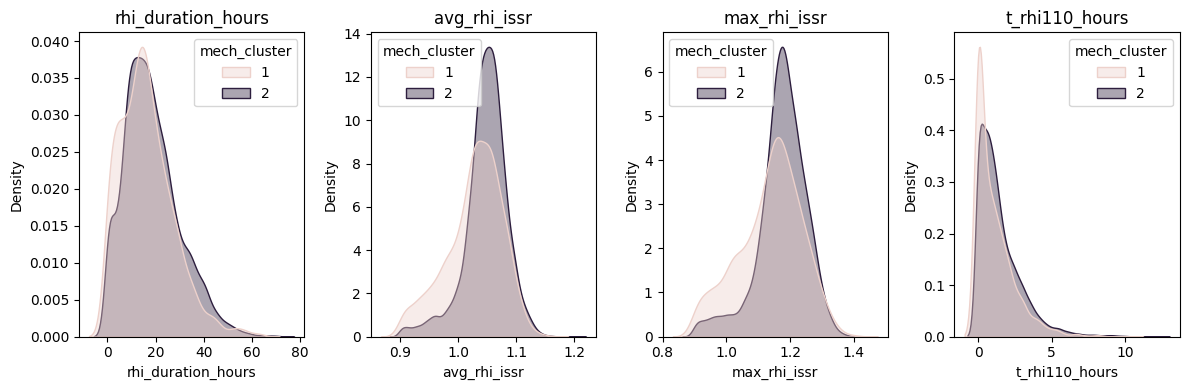

In [ ]:
plt.figure(figsize=(12,4))

for i, v in enumerate(outcome_vars, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(
        data=df_out,
        x=v,
        hue="mech_cluster",
        common_norm=False,
        fill=True,
        alpha=0.4
    )
    plt.title(v)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

for v in outcome_vars:
    g0 = df_out[df_out.mech_cluster == 1][v]
    g1 = df_out[df_out.mech_cluster == 2][v]

    stat, p = mannwhitneyu(g0, g1, alternative="two-sided")
    print(f"{v:20s}  p = {p:.2e}")


rhi_duration_hours    p = 5.43e-13
avg_rhi_issr          p = 7.95e-55
max_rhi_issr          p = 5.62e-45
t_rhi110_hours        p = 8.22e-38


In [ ]:
def cliffs_delta(x, y):
    nx = len(x)
    ny = len(y)
    gt = sum(xx > yy for xx in x for yy in y)
    lt = sum(xx < yy for xx in x for yy in y)
    return (gt - lt) / (nx * ny)

for v in outcome_vars:
    g0 = df_out[df_out.mech_cluster == 1][v].values
    g1 = df_out[df_out.mech_cluster == 2][v].values

    d = cliffs_delta(g0, g1)
    print(f"{v:20s}  Cliff's Δ = {d:.3f}")


rhi_duration_hours    Cliff's Δ = -0.113
avg_rhi_issr          Cliff's Δ = -0.245
max_rhi_issr          Cliff's Δ = -0.221
t_rhi110_hours        Cliff's Δ = -0.202


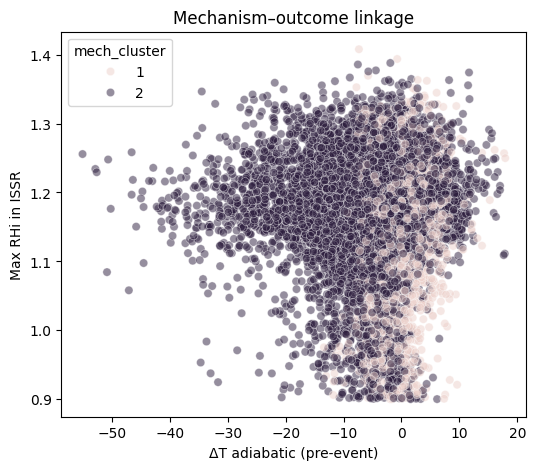

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df,
    x="delta_T_adiab_pre_event",
    y="max_rhi_issr",
    hue=df_out["mech_cluster"],
    alpha=0.5
)
plt.xlabel("ΔT adiabatic (pre-event)")
plt.ylabel("Max RHi in ISSR")
plt.title("Mechanism–outcome linkage")
plt.show()
